In [1]:
library(Seurat)
library(dplyr)
library(SeuratObject)
library(ggplot2)

## Do comparisons for all cell types
mac <- readRDS(file = paste0("./load_files/Macaque_E77-78_slim.rds"))
human <- readRDS(file = paste0("./load_files/Human_GW18-20_slim.rds"))

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## Average expression for macaque/human subtypes, used for:
## 1. heatmap visualization of transcriptomic similarity between the 2 species
## 2. dotplot visualization of gene expression
Idents(mac) <- "subtype"
avg_mac <- log(AverageExpression(mac)$RNA + 1)

Idents(human) <- "subclass"
avg_human <- log(AverageExpression(human)$RNA + 1)

In [3]:
## Shared HVGs used for heatmap visualization
hvg_mac <- SplitObject(mac, split.by = "cell_origin") %>%
            lapply(., function(x) FindVariableFeatures(x, nfeatures = 2500)) %>%
            SelectIntegrationFeatures(., nfeatures = 2000)
hvg_human <- SplitObject(human, split.by = "cell_origin") %>%
            lapply(., function(x) FindVariableFeatures(x, nfeatures = 2500)) %>%
            SelectIntegrationFeatures(., nfeatures = 2000)
hvg <- intersect(rownames(mac), rownames(human)) %>%
            intersect(., union(hvg_mac, hvg_human))

png 
  2

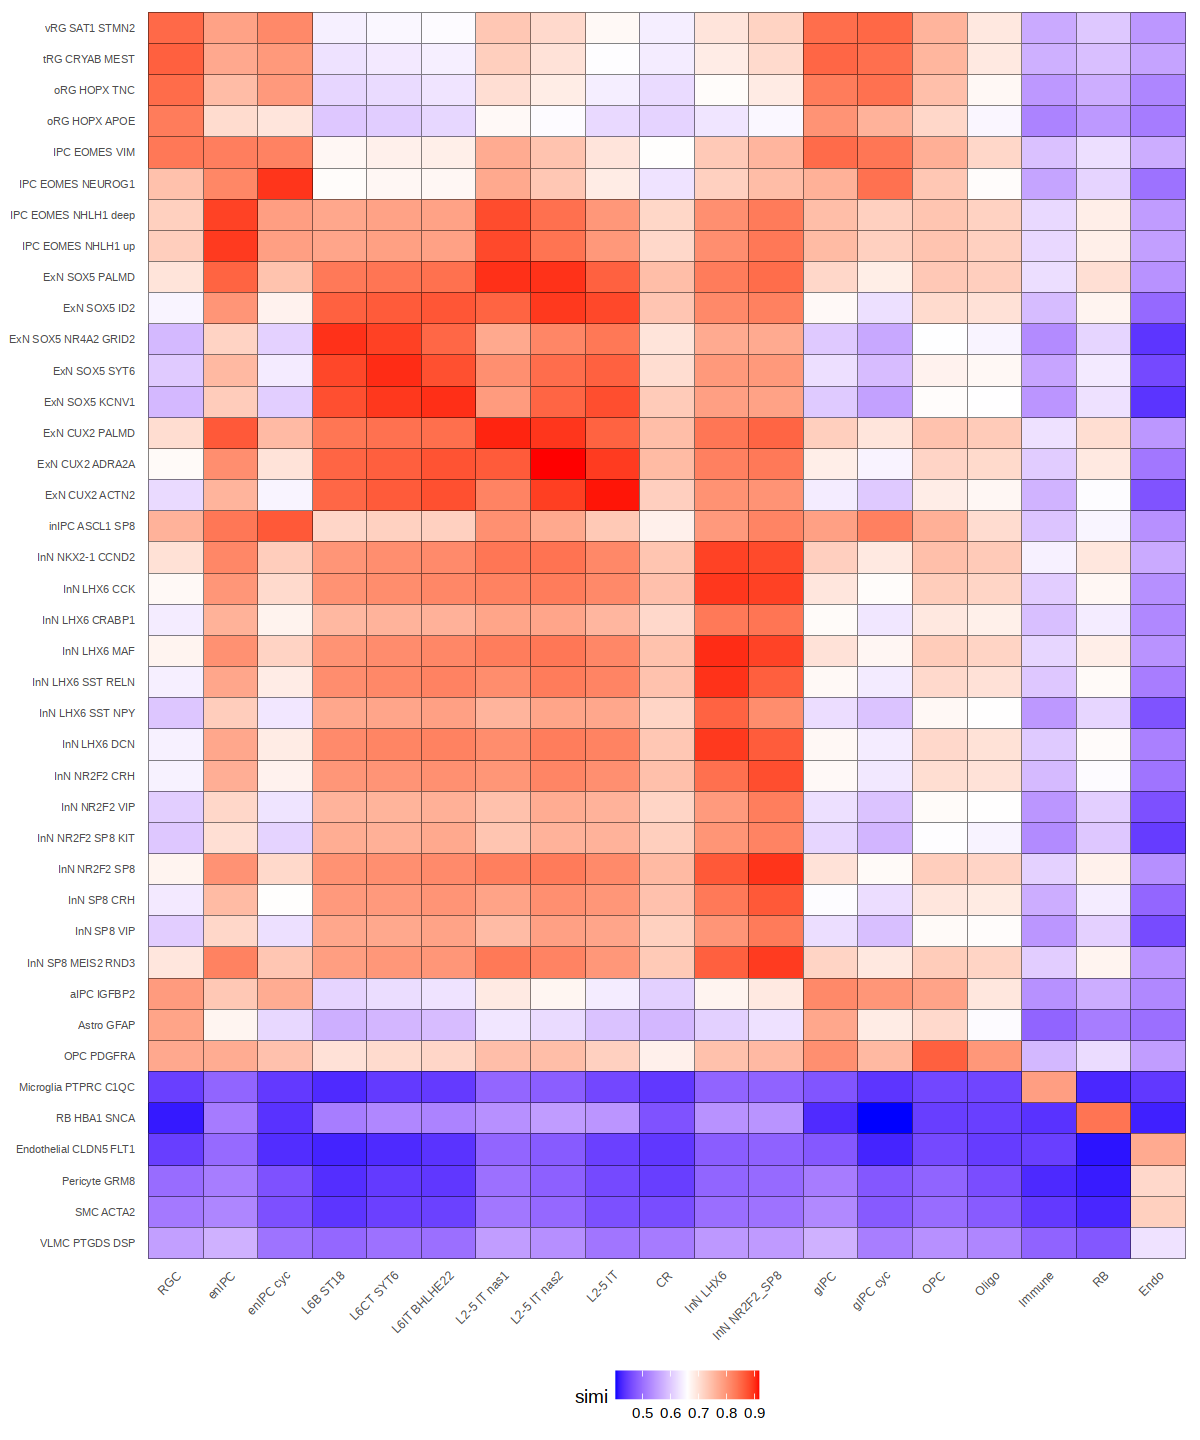

In [6]:
## Visualize transcriptomic similarity between the 2 species [pearson correlation]

## cluster order of macaque & human subtypes
ord_mac <- read.table(paste0("~/project/NHPfetal/inte_all/load_files/", "all.nhp.cbn.v7.txt"), 
                      sep="\t", stringsAsFactors=FALSE, header=TRUE)$cluster %>%
                intersect(., colnames(avg_mac))
ord_human <- c("RGC", "enIPC", "enIPC cyc", 
               "L6B ST18", "L6CT SYT6", "L6IT BHLHE22", 
               "L2-5 IT nas1", "L2-5 IT nas2", "L2-5 IT", 
               "CR", "InN LHX6", "InN NR2F2_SP8", 
               "gIPC", "gIPC cyc", "OPC", "Oligo", 
               "Immune", "RB", "Endo")

## correlation data for ggplot visualization
heat_data <- cor(avg_human[hvg, ], avg_mac[hvg, ], method = "p") %>%
                reshape2::melt() %>%
                setNames(., c("kridata", "mondata", "simi")) %>%
                filter(kridata %in% ord_human & mondata %in% ord_mac) %>%
                mutate(kridata = factor(as.character(kridata), levels = ord_human)) %>%
                mutate(mondata = factor(as.character(mondata), levels = rev(ord_mac)))

pheat <- ggplot(heat_data, aes_string(x = "kridata", y = "mondata", fill = "simi")) +
                geom_tile(width = 1, height = 1, size = 0.1, color = "black") +
                scale_fill_gradientn(colors = c("blue", "white", "red")) +
                theme_classic() +
                RotatedAxis() + 
                theme(legend.position = "bottom", 
                      axis.text.x = element_text(size = rel(0.8)), 
                      axis.line = element_blank(), 
                      axis.ticks = element_blank(), 
                      axis.title = element_blank(), 
                      axis.text.y = element_text(size = rel(0.7)))

options(repr.plot.width=10, repr.plot.height=12)
pheat

pdf(paste0("./report/", "MatchPublic.Kriegstein.Bhaduri.heatmap.E78.pdf"), width = 5, height = 6)
print(pheat)
dev.off() 

png 
  2

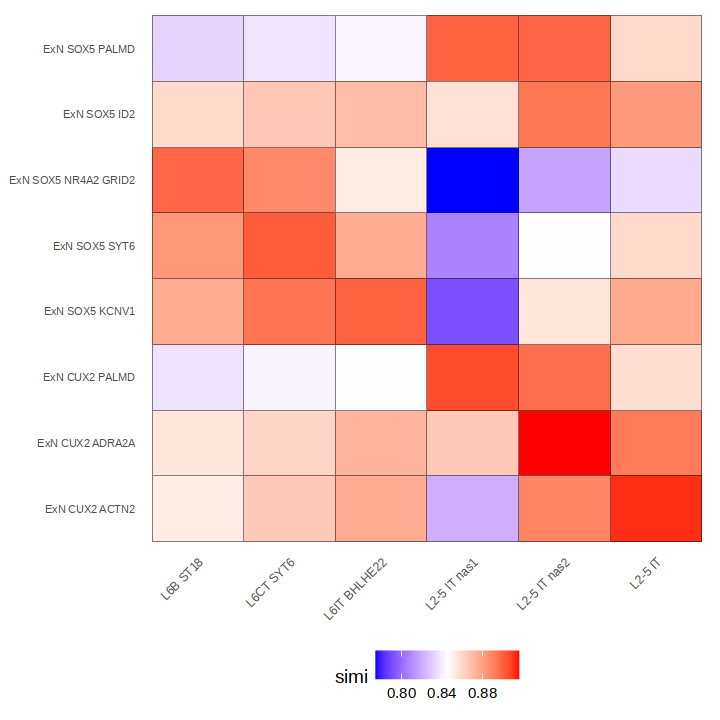

In [7]:
## cluster order of macaque & human subtypes [Only ExN subtypes]
ord_mac2 <- intersect(ord_mac, colnames(avg_mac))[9:16]
ord_human2 <- c("L6B ST18", "L6CT SYT6", "L6IT BHLHE22", "L2-5 IT nas1", "L2-5 IT nas2", "L2-5 IT")


## correlation data for ggplot visualization
heat_data2 <- cor(avg_human[hvg, ], avg_mac[hvg, ], method = "p") %>%
                reshape2::melt() %>%
                setNames(., c("kridata", "mondata", "simi")) %>%
                filter(kridata %in% ord_human2 & mondata %in% ord_mac2) %>%
                mutate(kridata = factor(as.character(kridata), levels = ord_human2)) %>%
                mutate(mondata = factor(as.character(mondata), levels = rev(ord_mac2)))

pheat2 <- ggplot(heat_data2, aes_string(x = "kridata", y = "mondata", fill = "simi")) +
                geom_tile(width = 1, height = 1, size = 0.1, color = "black") +
                scale_fill_gradientn(colors = c("blue", "white", "red")) +
                theme_classic() +
                RotatedAxis() + 
                theme(legend.position = "bottom", 
                      axis.text.x = element_text(size = rel(0.8)), 
                      axis.line = element_blank(), 
                      axis.ticks = element_blank(), 
                      axis.title = element_blank(), 
                      axis.text.y = element_text(size = rel(0.7)))
options(repr.plot.width=6, repr.plot.height=6)
pheat2
pdf(paste0("./report/", "MatchPublic.Kriegstein.Bhaduri.heatmap.E78.slim.pdf"), width = 5, height = 5)
print(pheat2)
dev.off() 


In [9]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS:   /gpfs/ycga/home/sm2726/packages/R_versions/R-4.1.0/lib64/R/lib/libRblas.so
LAPACK: /gpfs/ycga/home/sm2726/packages/R_versions/R-4.1.0/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.4.0      dplyr_1.0.10       SeuratObject_4.1.3 Seurat_4.3.0      

loaded via a namespace (and not attached):
  [1] Rtsne_0.16             colorspace_2.0-3       deldir_1.0-6   